# US Company Bankruptcy Prediction

### By Binita Patel, Faye Fong, Juan Pena

**The objective of this project is to predict US Company bankruptcy. This notebook goes through the data cleaning and EDA process.**

## Data Cleaning Section

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data
bank = pd.read_csv('../data/american_bankruptcy.csv')

In [3]:
# Look at the first 5 rows
bank.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [4]:
# Checking for NAs
bank.isna().sum()

company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

In [5]:
# Looking at data info to see if everything looks good
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [6]:
# Looking at the value counts by company name
bank.company_name.value_counts()

company_name
C_4081    20
C_6487    20
C_1153    20
C_4047    20
C_4056    20
          ..
C_1498     1
C_5908     1
C_2814     1
C_3997     1
C_3408     1
Name: count, Length: 8971, dtype: int64

In [7]:
# TODO handle single values

In [8]:
# Looking at the value counts by status label
bank.status_label.value_counts()

status_label
alive     73462
failed     5220
Name: count, dtype: int64

In [9]:
# Looking deeper into status_label column. Breaking it out into unique company counts
bank['status_label'] = np.where(bank['status_label'] == 'alive', 1, 0)

# Sort the DataFrame by year in descending order
bank_sorted = bank.sort_values(by='year', ascending=False)

# Drop duplicates keeping the first occurrence (which is the latest year after sorting)
bank_latest = bank_sorted.drop_duplicates(subset='company_name', keep='first')

# Check
bank_latest['status_label'].value_counts()

status_label
1    8362
0     609
Name: count, dtype: int64

In [10]:
# Looking at the value counts by year
bank.year.value_counts()

year
1999    5308
2000    5226
2001    4897
2002    4651
2003    4417
2004    4348
2005    4205
2006    4128
2007    4009
2008    3857
2009    3743
2010    3625
2011    3513
2014    3504
2012    3485
2013    3484
2015    3354
2016    3191
2017    3014
2018    2723
Name: count, dtype: int64

In [11]:
# Looking at the summary statistics
bank.describe()

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,0.933657,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,0.248882,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,0.000000,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,1.000000,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,1.000000,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,1.000000,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,1.000000,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


**Overall, the data was clean as this dataset was from Kaggle. Also, did not see any outliers worth mentioning.**

## EDA Section

In [12]:
bank.columns

Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18'],
      dtype='object')

**Below are scatterplots of each of the X columns by year. The most interesting ones were the EBITDA and Net Income as we feel these are the best indicators of bankruptcy.**

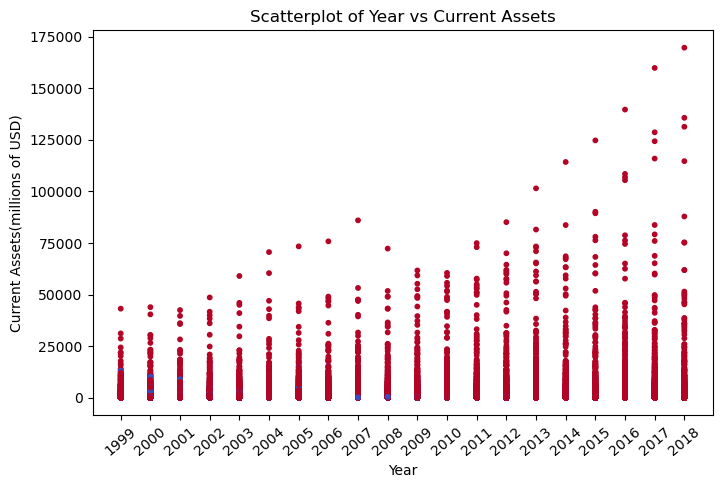

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X1'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Current Assets')
plt.xlabel('Year')
plt.ylabel('Current Assets(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

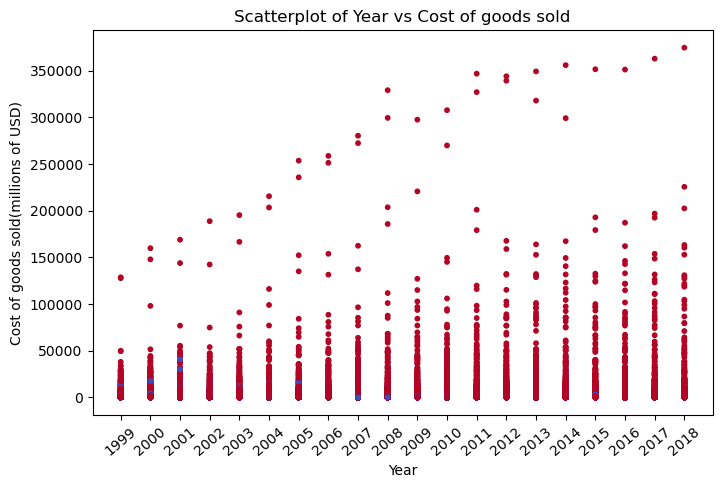

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X2'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Cost of goods sold')
plt.xlabel('Year')
plt.ylabel('Cost of goods sold(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

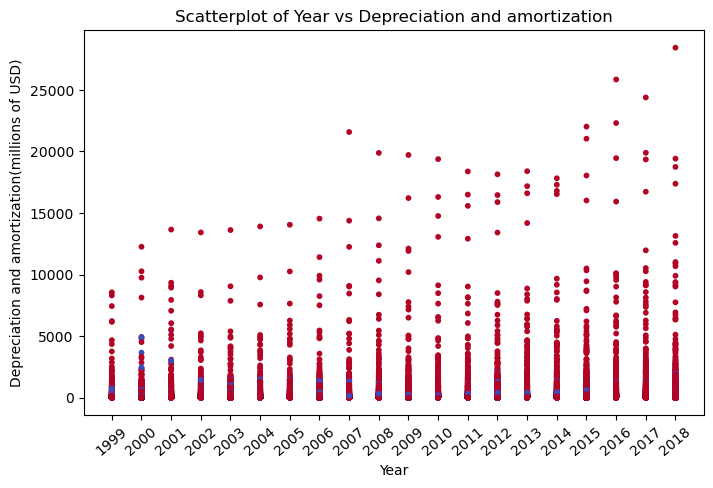

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X3'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Depreciation and amortization')
plt.xlabel('Year')
plt.ylabel('Depreciation and amortization(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

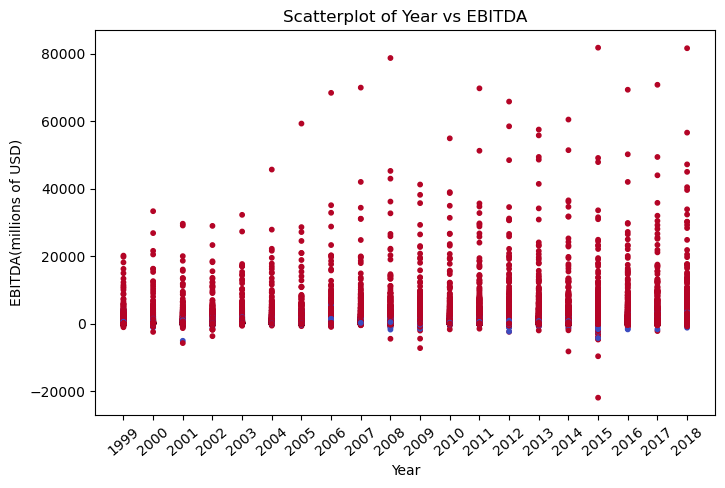

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X4'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs EBITDA')
plt.xlabel('Year')
plt.ylabel('EBITDA(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

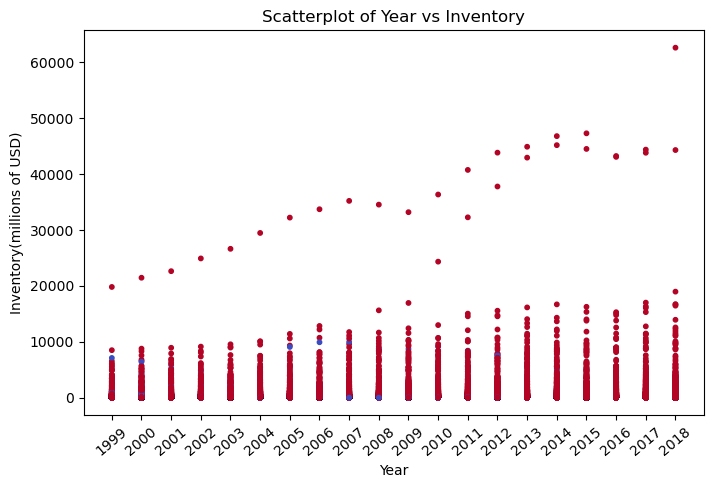

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X5'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Inventory')
plt.xlabel('Year')
plt.ylabel('Inventory(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

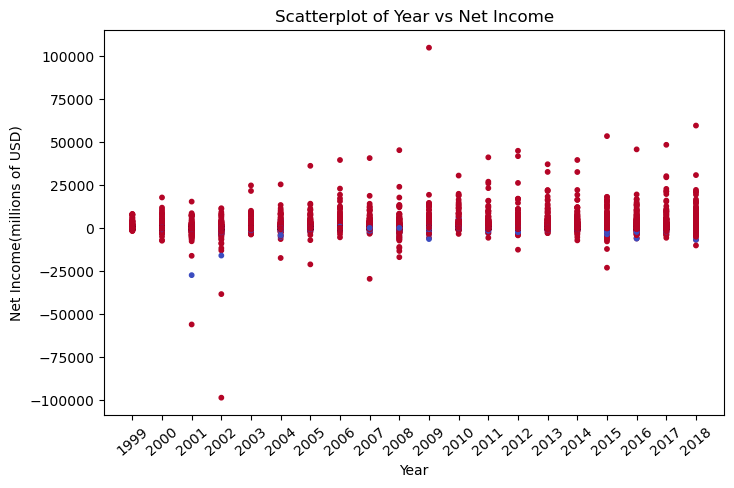

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X6'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Net Income')
plt.xlabel('Year')
plt.ylabel('Net Income(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

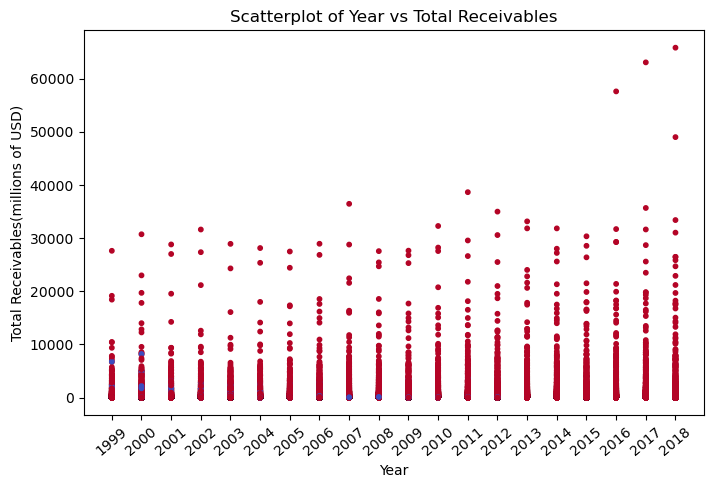

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X7'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Total Receivables')
plt.xlabel('Year')
plt.ylabel('Total Receivables(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

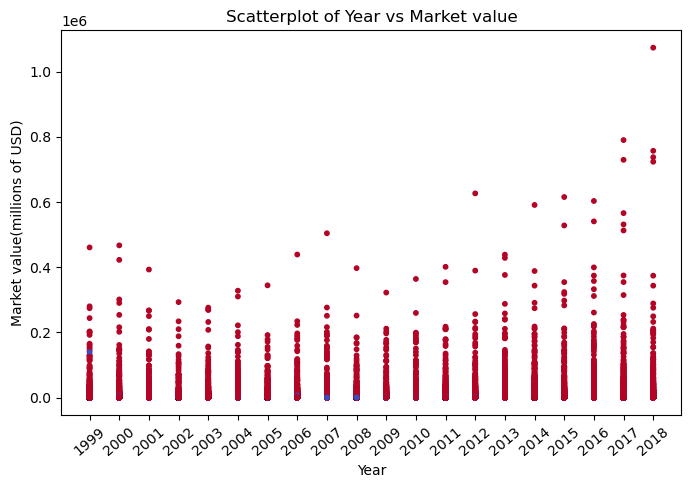

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X8'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Market value')
plt.xlabel('Year')
plt.ylabel('Market value(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

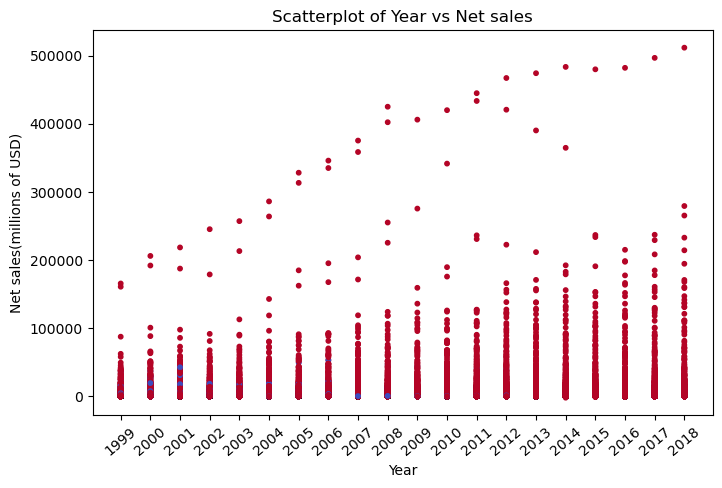

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X9'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Net sales')
plt.xlabel('Year')
plt.ylabel('Net sales(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

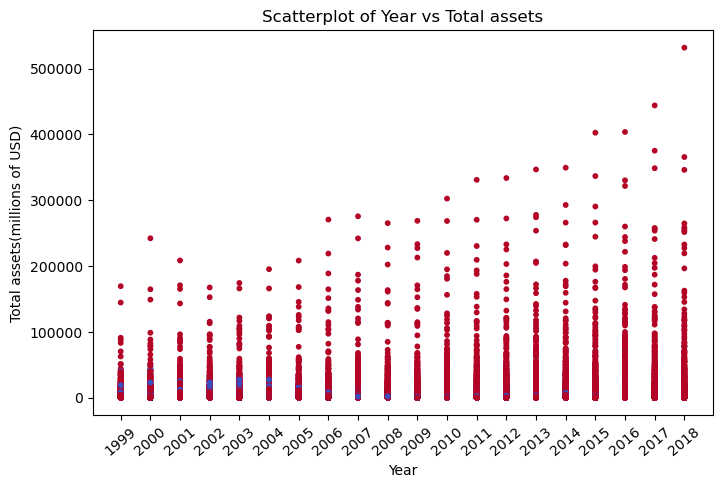

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X10'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Total assets')
plt.xlabel('Year')
plt.ylabel('Total assets(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

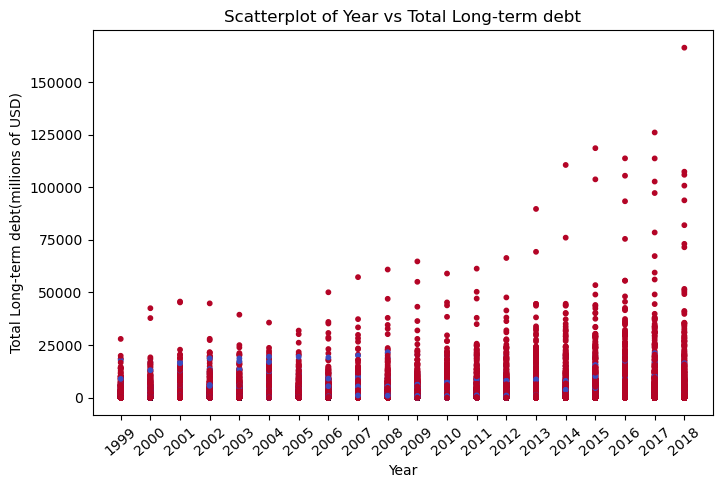

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X11'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Total Long-term debt')
plt.xlabel('Year')
plt.ylabel('Total Long-term debt(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

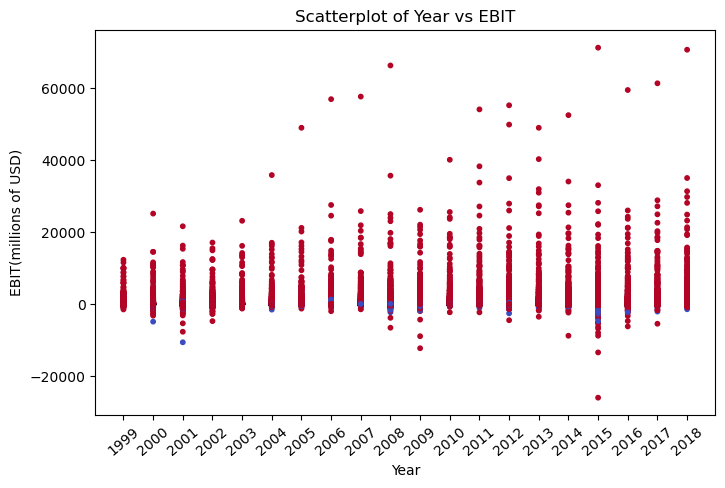

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X12'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs EBIT')
plt.xlabel('Year')
plt.ylabel('EBIT(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

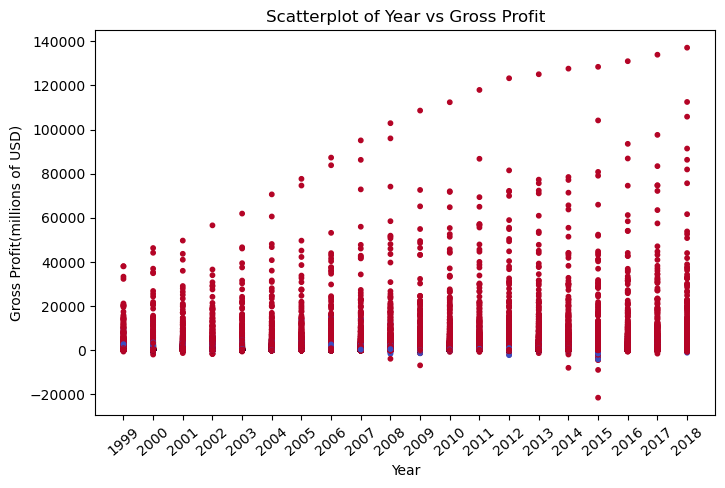

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X13'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Gross Profit')
plt.xlabel('Year')
plt.ylabel('Gross Profit(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

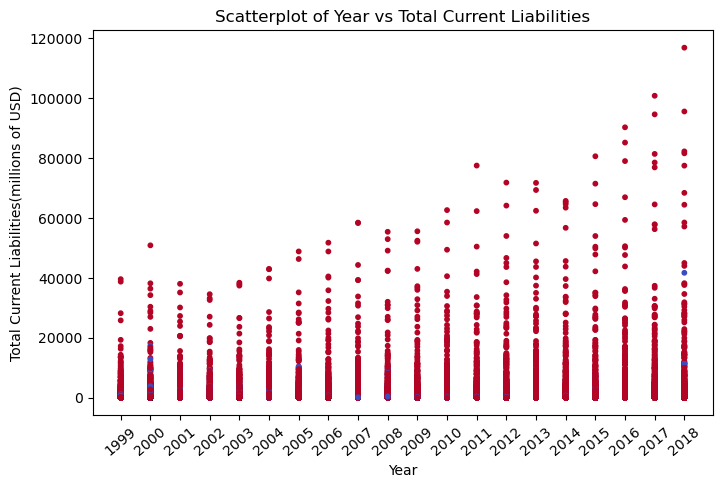

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X14'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Total Current Liabilities')
plt.xlabel('Year')
plt.ylabel('Total Current Liabilities(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

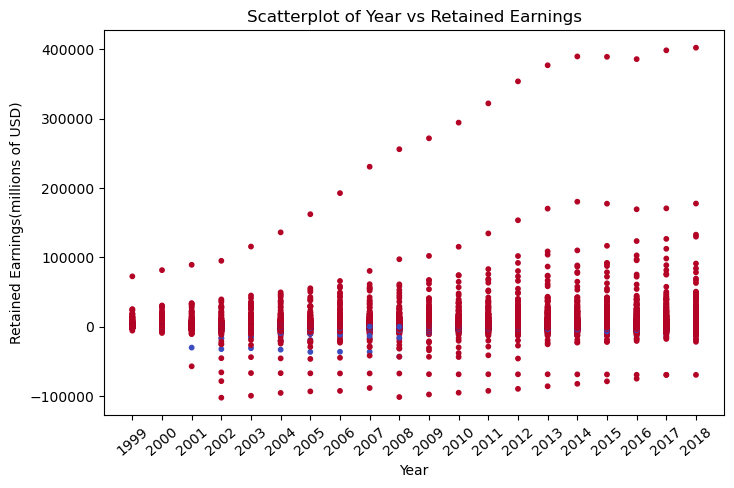

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X15'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Retained Earnings')
plt.xlabel('Year')
plt.ylabel('Retained Earnings(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

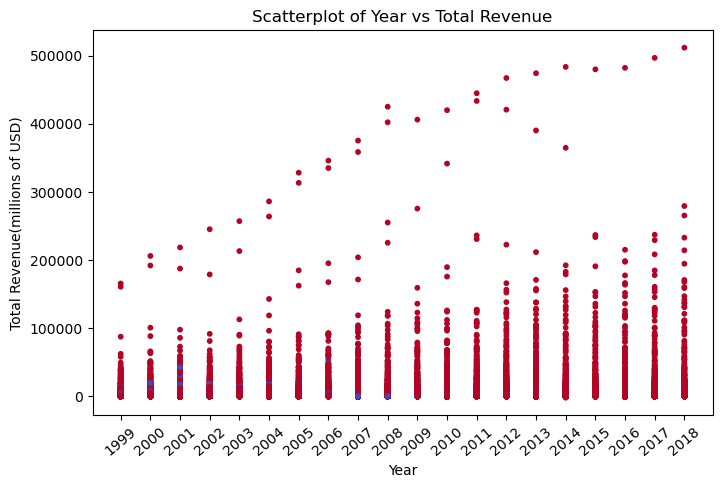

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X16'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Total Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

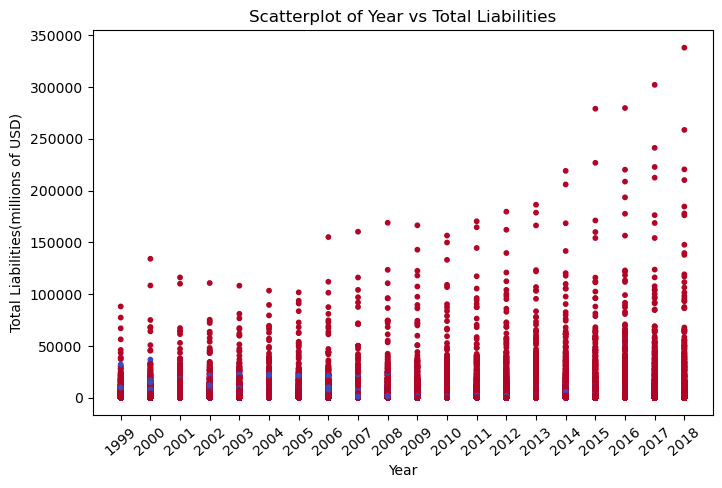

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X17'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Total Liabilities')
plt.xlabel('Year')
plt.ylabel('Total Liabilities(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

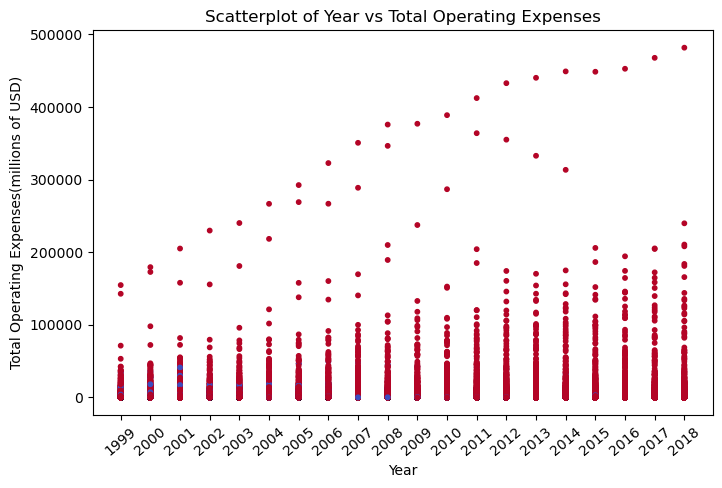

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(bank['year'], bank['X18'], c=bank['status_label'], cmap='coolwarm', alpha = 1, s = 10, edgecolors=None)
plt.title('Scatterplot of Year vs Total Operating Expenses')
plt.xlabel('Year')
plt.ylabel('Total Operating Expenses(millions of USD)')
plt.xticks(range(1999,2019), rotation = 40);

In [31]:
# bankruptcy count
bank[bank.status_label == 0].groupby('year').count()

,company_name,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
year,,,,,,,,,,,,,,,,,,,,
1999,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2000,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404
2001,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414
2002,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414
2003,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415
2004,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404
2005,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379
2006,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366
2007,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336


**Below is a distribution plot of status label looking at the distribution between alive and failed. We can see that the classes are imbalanced.**

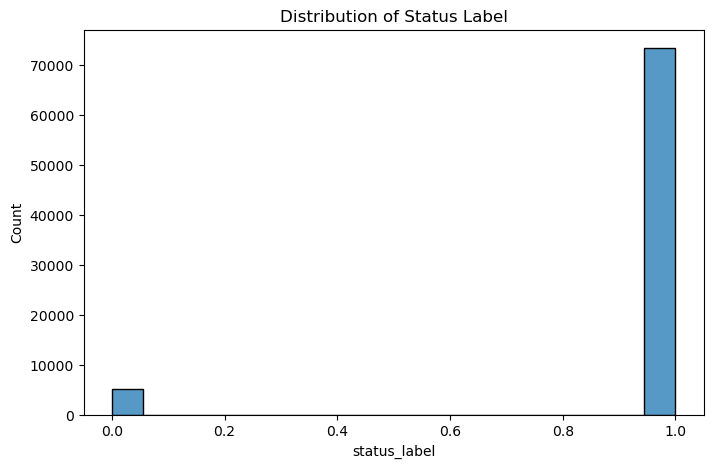

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(bank['status_label'])
plt.title('Distribution of Status Label');

**Below is a heatmap of the correlations between the numeric columns. Some correlations to point out are as follows:**
- X9 AND X2 (0.98)
- X16 AND X2 (0.98)
- X18 AND X2 (0.99)
- X12 AND X4 (0.97)
- X16 AND X9 (1)
- X18 AND X9 (0.99)
- X17 AND X10 (0.97)
- X18 AND X16 (0.99)

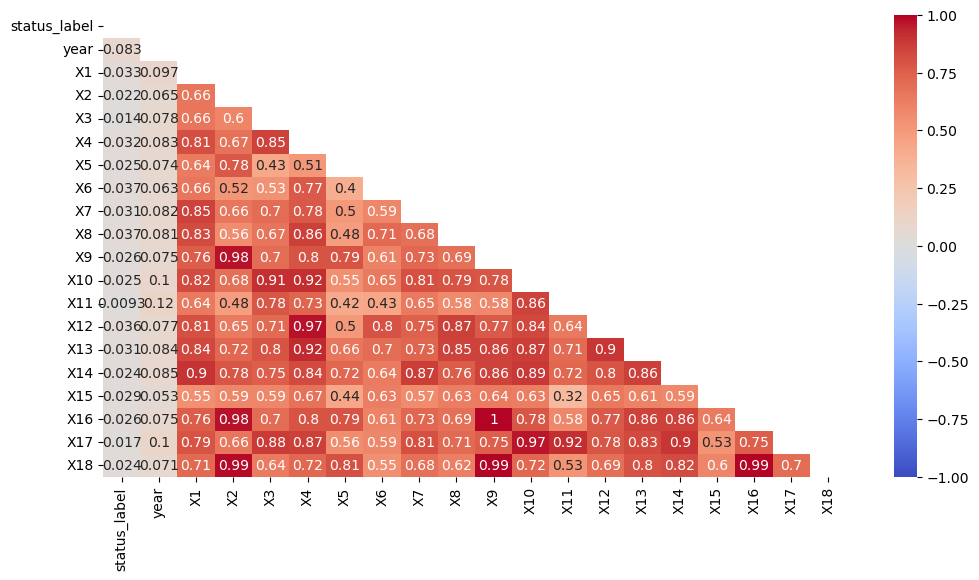

In [33]:
corr= bank.corr(numeric_only = True)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

plt.figure(figsize=(12,6))
sns.heatmap(data = corr,
            annot = True,
            vmin = -1,
            vmax = 1,
           cmap = "coolwarm",
           mask = matrix);